Homework 4: Sentiment Analysis - Task 4
----

Names & Sections
----
Names: Anisha Kushwaha 6120
Sarthak Kagliwal 6120 (Write these in every notebook you submit. For each partner, write down whether you are a 4120 or a 6120 student.)

Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [1]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout
# from keras.metrics import Precision, Recall

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import string



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
# TRAIN_FILE = "movie_reviews_train.txt"
# DEV_FILE = "movie_reviews_dev.txt"

TRAIN_FILE = "own_train.txt"
DEV_FILE = "own_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)



# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later
documents = [' '.join(document) for document in train_tups[0]]
mul_vec = CountVectorizer()
train_mul_bow_sk = mul_vec.fit_transform(documents).toarray()

bin_vec = CountVectorizer(binary=True)
train_bin_bow_sk = bin_vec.fit_transform(documents).toarray()

In [3]:
Y_train = np.array(train_tups[1])
Y_dev = np.array(dev_tups[1])

In [4]:
dev_mul_vec = CountVectorizer(vocabulary=mul_vec.vocabulary_)
dev_mul_bow_sk = dev_mul_vec.fit_transform([' '.join(document) for document in dev_tups[0]]).toarray()
dev_bin_vec = CountVectorizer(vocabulary=bin_vec.vocabulary_)
dev_bin_bow_sk = dev_bin_vec.fit_transform([' '.join(document) for document in dev_tups[0]]).toarray()


In [5]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to

# create/compile your model in this cell

model = Sequential()
input_shape = (train_bin_bow_sk.shape[1],)
model.add(Dense(256, activation='relu',input_shape=input_shape))
# model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))


# put in an output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()
# call compile here
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5784832   
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5801345 (22.13 MB)
Trainable params: 5801345 (22.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


How many trainable parameters does your model have? 5801345

In [6]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer
def train_model(tr_data_per, train_bow, tr_model):
  tr_data_len = int(len(train_bow[0]) * tr_data_per)
  random_indices = np.random.choice(len(train_bow[0]), tr_data_len, replace=False)
  X_tr = train_bow[0][random_indices]
  Y_tr = train_bow[1][random_indices]
  tr_model.fit(X_tr, Y_tr, epochs=5, batch_size=64, verbose=1)
  return tr_model

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array



In [7]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer
def model_pred(trained_model, dev_data, verbose):
  y_pred = trained_model.predict(dev_data[0])
  nn_preds = [1 if x>=0.5 else 0 for x in y_pred]
  # print("nn_preds", y_pred)
  NN_metrics =  sutils.get_prfa(dev_data[1], nn_preds, verbose)
  print(f'\nF1-score is : {NN_metrics[2]:.2f}\n')
  return NN_metrics



In [8]:
# use the model.evaluate function to report the loss and accuracy on the dev set
def acc_loss(dev_data):
  loss, accuracy = model.evaluate(dev_data[0], dev_data[1])
  print(f'\nLoss is: {loss:.2f}\nAccuracy is: {accuracy:.2f}\n')

In [9]:
def train_on_data(i, train_data, dev_data, verbose):
  nn_model = train_model(i, train_data, model)
  pred_metric = model_pred(nn_model, dev_data, verbose)
  acc_loss(dev_data)
  return pred_metric

print("Using Binarized features:")
NN_Bin_metrics = train_on_data(1.0, [train_bin_bow_sk, Y_train],[dev_bin_bow_sk,Y_dev], True)

print("Using Multinomial features:")
NN_Mul_metrics = train_on_data(1.0, [train_mul_bow_sk, Y_train],[dev_mul_bow_sk,Y_dev], True)

Using Binarized features:
Epoch 1/5
25/25 [==============================] - 5s 108ms/step - loss: 0.6934 - accuracy: 0.5069
Epoch 2/5
25/25 [==============================] - 3s 113ms/step - loss: 0.6836 - accuracy: 0.6125
Epoch 3/5
25/25 [==============================] - 3s 111ms/step - loss: 0.6734 - accuracy: 0.6856
Epoch 4/5
25/25 [==============================] - 2s 91ms/step - loss: 0.6612 - accuracy: 0.7400
Epoch 5/5
10/10 [==============================] - 0s 16ms/step
Precision: 0.34
Recall: 0.72
F1 Score: 0.46
Accuracy: 0.50

F1-score is : 0.46

10/10 [==============================] - 0s 17ms/step - loss: 0.6936 - accuracy: 0.4967

Loss is: 0.69
Accuracy is: 0.50

Using Multinomial features:
Epoch 1/5
25/25 [==============================] - 1s 51ms/step - loss: 0.6268 - accuracy: 0.6931
Epoch 2/5
25/25 [==============================] - 1s 50ms/step - loss: 0.5992 - accuracy: 0.6975
Epoch 3/5
25/25 [==============================] - 1s 52ms/step - loss: 0.5625 - accuracy

Epoch 1/5
3/3 [==============================] - 1s 53ms/step - loss: 0.5670 - accuracy: 0.7750
Epoch 2/5
3/3 [==============================] - 0s 48ms/step - loss: 0.5519 - accuracy: 0.8500
Epoch 3/5
3/3 [==============================] - 0s 45ms/step - loss: 0.5388 - accuracy: 0.8750
Epoch 4/5
3/3 [==============================] - 0s 46ms/step - loss: 0.5291 - accuracy: 0.8875
Epoch 5/5
10/10 [==============================] - 0s 19ms/step
Precision: 0.33
Recall: 0.85

F1-score is : 0.48

10/10 [==============================] - 0s 22ms/step - loss: 0.6994 - accuracy: 0.4500

Loss is: 0.70
Accuracy is: 0.45

Epoch 1/5
5/5 [==============================] - 0s 55ms/step - loss: 0.5253 - accuracy: 0.8687
Epoch 2/5
5/5 [==============================] - 0s 58ms/step - loss: 0.5136 - accuracy: 0.8875
Epoch 3/5
5/5 [==============================] - 0s 57ms/step - loss: 0.5023 - accuracy: 0.8906
Epoch 4/5
5/5 [==============================] - 0s 54ms/step - loss: 0.4913 - accuracy: 0.8

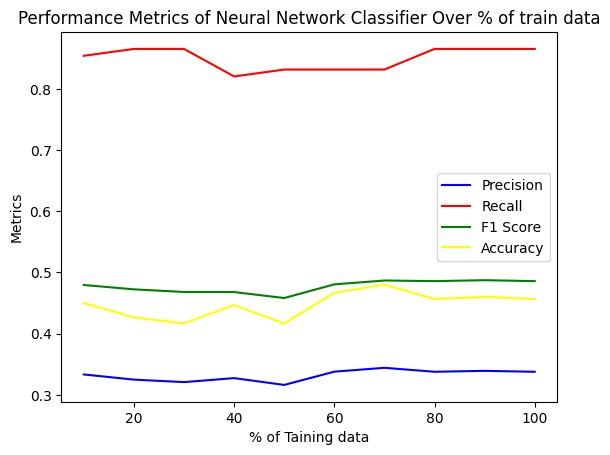

<Figure size 640x480 with 0 Axes>

In [10]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!
def generate_graphs(train_data, dev_data):
    prfa_values = [[],[],[],[]]
    training_len = []
    for i in np.arange(0.1, 1.1, 0.1):
        training_len.append(i*100)
        pred_metric = train_on_data(i, train_data, dev_data, False)
        for i in range(len(pred_metric)):
            prfa_values[i].append(pred_metric[i])
    return training_len, prfa_values

x_axis, y_axis = generate_graphs([train_bin_bow_sk, Y_train],[dev_bin_bow_sk,Y_dev])


sutils.create_training_graph(x_axis, y_axis, 'Neural Network Classifier', 'NNgraph4.png')
# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)



Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: 5
- multinomial features: 0.46
- binarized features: 0.46